In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


facts_table = pd.read_csv('facts_table_with_charge.csv')
cols = ['id', 'manufacturer', 'brand', 'os_version']
device_df = pd.read_csv(r'C:\Users\ruben\Desktop\Investigation\Datasets\updated_dataset_07_18_2018\devices.csv', usecols=cols)

facts_table = facts_table[facts_table.time_diff >= 0.25].reset_index(drop=True)
device_df.rename(columns={"id": "device_id"}, inplace=True)

display(facts_table.head())
display(device_df.head())

,device_id,time_diff,battery_diff,rate,charging,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,flashlight_enabled_time,nfc_enabled_time,developer_mode_time,charger
0,1,5.67,-0.65,-0.115,False,58,4.93,0.74,0.0,5.45,0.0,0.0,0.0,0.0,unplugged
1,1,0.98,0.46,0.471,True,47,0.00,0.98,0.0,0.88,0.0,0.0,0.0,0.0,ac
2,1,1.15,-0.10,-0.087,False,11,1.09,0.06,0.0,1.09,0.0,0.0,0.0,0.0,unplugged
3,1,0.84,0.29,0.344,True,30,0.86,-0.02,0.0,0.86,0.0,0.0,0.0,0.0,ac
4,1,0.32,-0.03,-0.095,False,4,0.21,0.11,0.0,0.21,0.0,0.0,0.0,0.0,unplugged


,device_id,manufacturer,brand,os_version
0,1,LGE,lge,6.0.1
1,2,YU,YU,5.1.1
2,3,asus,asus,5.1.1
3,4,LGE,google,6.0.1
4,5,LGE,lge,4.4.2


In [2]:
merged_df = facts_table.merge(device_df, on='device_id', how='inner')
merged_df['brand'] = merged_df['brand'].str.lower()
merged_df['manufacturer'] = merged_df['manufacturer'].str.lower()

merged_df.head()

,device_id,time_diff,battery_diff,rate,charging,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,flashlight_enabled_time,nfc_enabled_time,developer_mode_time,charger,manufacturer,brand,os_version
0,1,5.67,-0.65,-0.115,False,58,4.93,0.74,0.0,5.45,0.0,0.0,0.0,0.0,unplugged,lge,lge,6.0.1
1,1,0.98,0.46,0.471,True,47,0.00,0.98,0.0,0.88,0.0,0.0,0.0,0.0,ac,lge,lge,6.0.1
2,1,1.15,-0.10,-0.087,False,11,1.09,0.06,0.0,1.09,0.0,0.0,0.0,0.0,unplugged,lge,lge,6.0.1
3,1,0.84,0.29,0.344,True,30,0.86,-0.02,0.0,0.86,0.0,0.0,0.0,0.0,ac,lge,lge,6.0.1
4,1,0.32,-0.03,-0.095,False,4,0.21,0.11,0.0,0.21,0.0,0.0,0.0,0.0,unplugged,lge,lge,6.0.1


<h1><center>Charge Rate per Android version</center></h1>

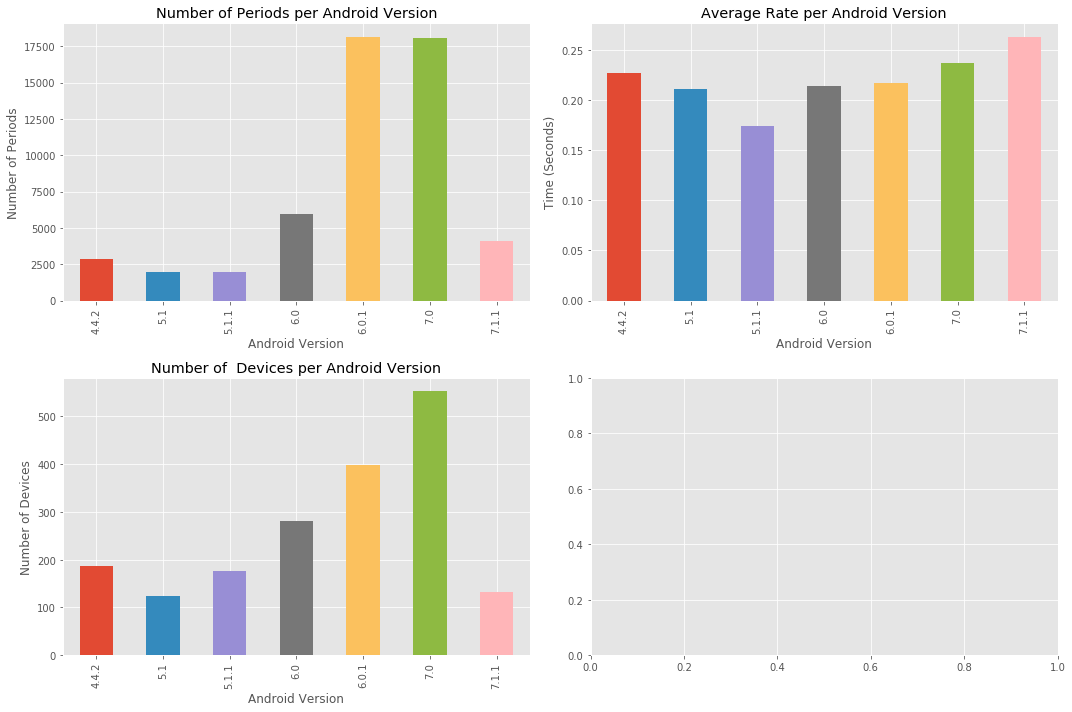

In [3]:
charge_periods = merged_df[merged_df.rate > 0]

count = charge_periods.groupby('os_version').rate.count()

android_version_rates_means = charge_periods.groupby('os_version').rate.mean()

devices_each_android_version = charge_periods.groupby('os_version').device_id.unique()
for i, v in devices_each_android_version.iteritems():
    devices_each_android_version[i] = len(v)

devices_index = devices_each_android_version[devices_each_android_version >= 100].index
# -------------------------------------

plt.subplots(2,2,figsize=(15, 10))
plt.subplot(2, 2, 1)
plot1 = count.loc[devices_index].plot(kind='bar', title='Number of Periods per Android Version')
plot1.set(xlabel='Android Version', ylabel='Number of Periods')

plt.subplot(2, 2, 2)
plot2 = android_version_rates_means.loc[devices_index].plot(kind='bar', title='Average Rate per Android Version')
plot2.set(xlabel='Android Version', ylabel='Time (Seconds)')

plt.subplot(2, 2, 3)
plt3 = devices_each_android_version.loc[devices_index].plot(kind='bar', title='Number of  Devices per Android Version')
plt3.set(xlabel='Android Version', ylabel='Number of Devices')

plt.tight_layout()
plt.show()

<h1><center>Discharge Rate per Android version</center></h1>

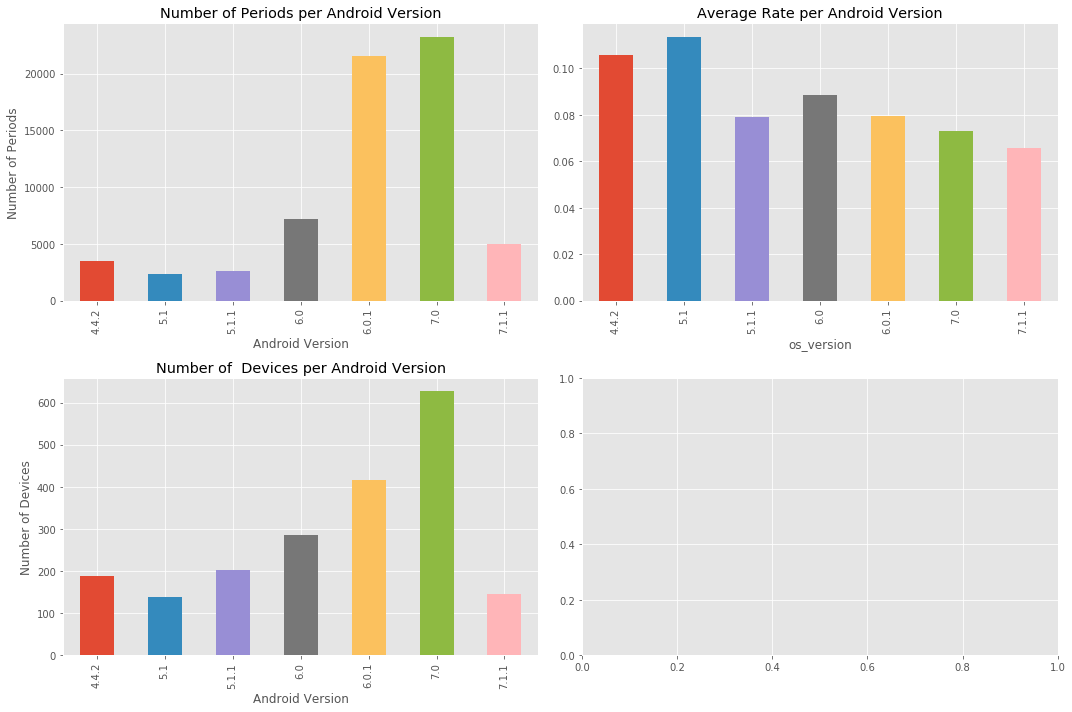

In [4]:
charge_periods = merged_df[merged_df.rate < 0]

count = charge_periods.groupby('os_version').rate.count()
# count = count[count >= 500]

android_version_rates_means = charge_periods.groupby('os_version').rate.mean()

devices_each_android_version = charge_periods.groupby('os_version').device_id.unique()
for i, v in devices_each_android_version.iteritems():
    devices_each_android_version[i] = len(v)

devices_index = devices_each_android_version[devices_each_android_version >= 100].index
# -------------------------------------

plt.subplots(2,2,figsize=(15, 10))
plt.subplot(2, 2, 1)
plot1 = count.loc[devices_index].plot(kind='bar', title='Number of Periods per Android Version')
plot1.set(xlabel='Android Version', ylabel='Number of Periods')

plt.subplot(2, 2, 2)
plt2 = abs(android_version_rates_means.loc[devices_index]).plot(kind='bar', title='Average Rate per Android Version')
plot2.set(xlabel='Android Version', ylabel='Time (Seconds)')

plt.subplot(2, 2, 3)
plt3 = devices_each_android_version.loc[devices_index].plot(kind='bar', title='Number of  Devices per Android Version')
plt3.set(xlabel='Android Version', ylabel='Number of Devices')

plt.tight_layout()
plt.show()

<h1><center>Charge Rate per Brand</center></h1>

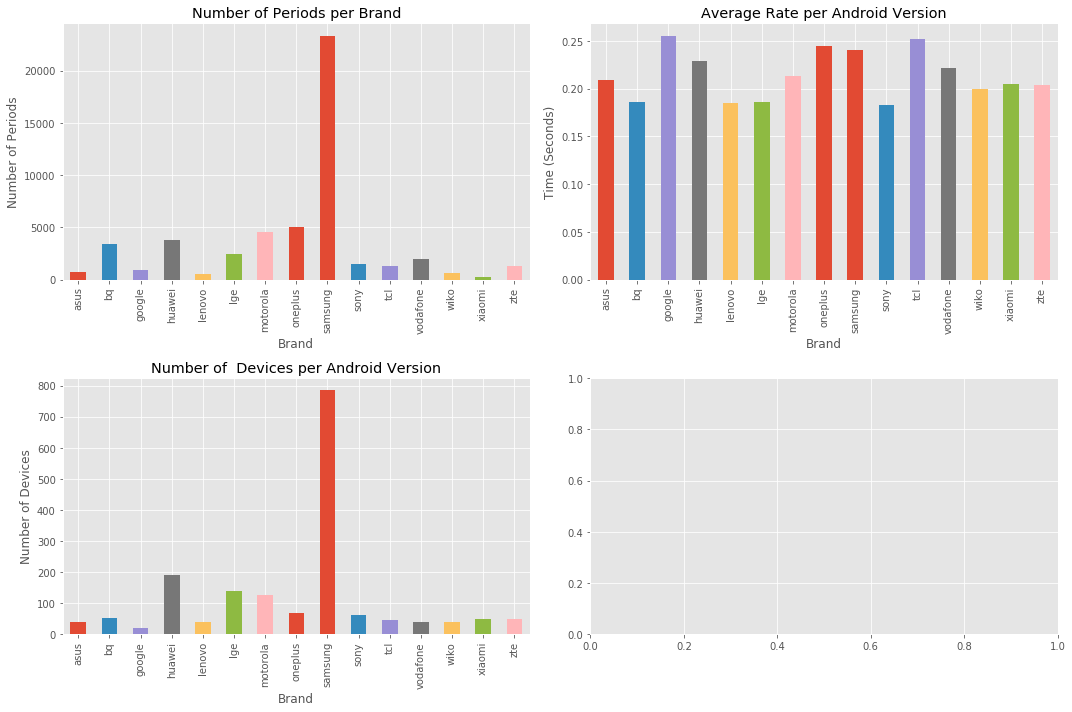

In [5]:
charge_periods = merged_df[merged_df.rate > 0]

count = charge_periods.groupby('brand').rate.count()
# count = count[count >= 500]

android_version_rates_means = charge_periods.groupby('brand').rate.mean()

devices_each_android_version = charge_periods.groupby('brand').device_id.unique()
for i, v in devices_each_android_version.iteritems():
    devices_each_android_version[i] = len(v)

devices_index = devices_each_android_version[devices_each_android_version >= 20].index
# -------------------------------------

plt.subplots(2,2,figsize=(15, 10))
plt.subplot(2, 2, 1)
plt1 = count.loc[devices_index].plot(kind='bar', title='Number of Periods per Brand')
plt1.set(xlabel='Brand', ylabel='Number of Periods')

plt.subplot(2, 2, 2)
plt2 = android_version_rates_means.loc[devices_index].plot(kind='bar', title='Average Rate per Android Version')
plt2.set(xlabel='Brand', ylabel='Time (Seconds)')

plt.subplot(2, 2, 3)
plt3 = devices_each_android_version.loc[devices_index].plot(kind='bar', title='Number of  Devices per Android Version')
plt3.set(xlabel='Brand', ylabel='Number of Devices')

plt.tight_layout()
plt.show()

<h1><center>Disharge Rate per Brand</center></h1>

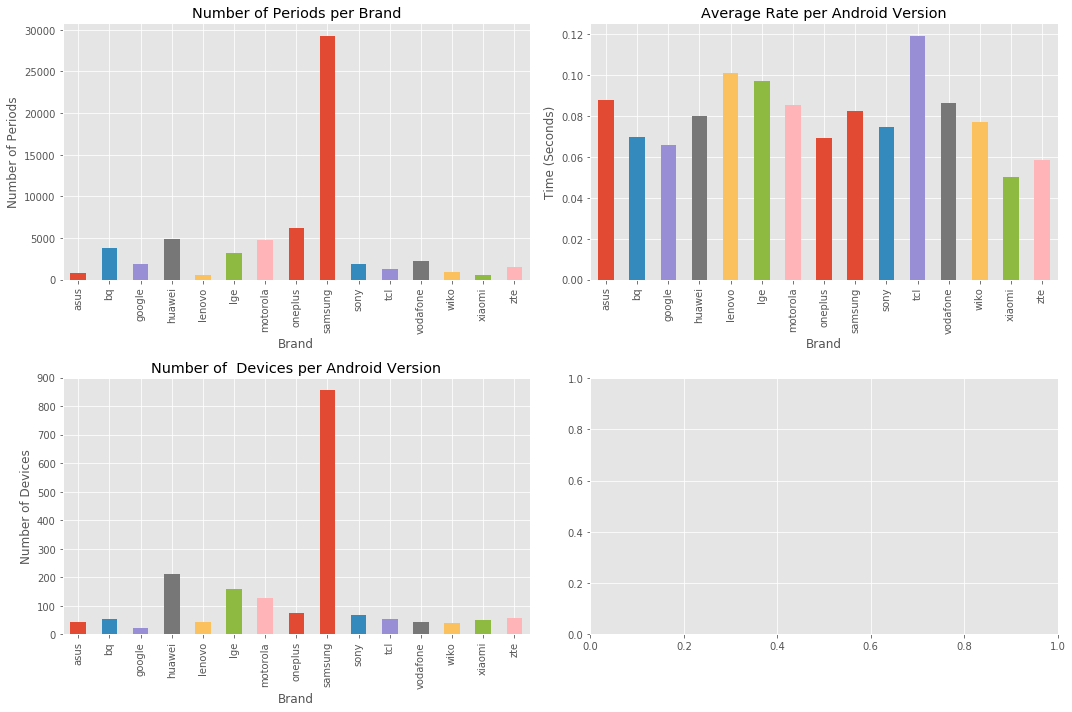

In [6]:
charge_periods = merged_df[merged_df.rate < 0]

count = charge_periods.groupby('brand').rate.count()
# count = count[count >= 500]

android_version_rates_means = charge_periods.groupby('brand').rate.mean()

devices_each_android_version = charge_periods.groupby('brand').device_id.unique()
for i, v in devices_each_android_version.iteritems():
    devices_each_android_version[i] = len(v)

devices_index = devices_each_android_version[devices_each_android_version >= 20].index
# -------------------------------------

plt.subplots(2,2,figsize=(15, 10))
plt.subplot(2, 2, 1)
plt1 = count.loc[devices_index].plot(kind='bar', title='Number of Periods per Brand')
plt1.set(xlabel='Brand', ylabel='Number of Periods')
                              
plt.subplot(2, 2, 2)
plt2 = abs(android_version_rates_means.loc[devices_index]).plot(kind='bar', title='Average Rate per Android Version')
plt2.set(xlabel='Brand', ylabel='Time (Seconds)')

plt.subplot(2, 2, 3)
plt3 = devices_each_android_version.loc[devices_index].plot(kind='bar', title='Number of  Devices per Android Version')
plt3.set(xlabel='Brand', ylabel='Number of Devices')
                                     
plt.tight_layout()
plt.show()

<h1><center>Correlations</center></h1>

# Overall

In [7]:
d = dict()

val = 0
for i in merged_df.brand.unique():
    d[i] = val
    val= val + 1
    
merged_df['brand'] = merged_df.brand.map(d)

d = dict()

val = 0
for i in merged_df.os_version.unique():
    d[i] = val
    val= val + 1

merged_df['os_version'] = merged_df.os_version.map(d)

merged_df.drop(['device_id', 'developer_mode_time', 'flashlight_enabled_time'], axis=1).corr().style.background_gradient(cmap='Reds')

,time_diff,battery_diff,rate,charging,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,nfc_enabled_time,brand,os_version
time_diff,1,-0.343368,-0.210712,-0.208702,0.14419,0.413622,0.63407,0.228027,0.329333,0.141641,0.197329,-0.0440384,-0.0283026
battery_diff,-0.343368,1,0.650936,0.732871,0.110071,-0.252329,-0.124035,-0.140391,-0.200938,-0.0800216,-0.12306,0.00398432,-0.000525752
rate,-0.210712,0.650936,1,0.65463,0.208017,-0.164369,-0.0680263,-0.0832469,-0.115154,-0.051189,-0.0732095,-0.00893811,-0.0125409
charging,-0.208702,0.732871,0.65463,1,0.161313,-0.113231,-0.109479,-0.0623883,-0.0887224,-0.0296579,-0.0477209,0.0096912,-0.00847826
number_samples,0.14419,0.110071,0.208017,0.161313,1,0.166771,0.000435422,0.107929,0.193221,0.0454178,0.113231,0.0317213,0.00765658
screen_on_time,0.413622,-0.252329,-0.164369,-0.113231,0.166771,1,-0.441761,0.344217,0.549969,0.196019,0.324657,-0.0179203,-0.0101502
screen_off_time,0.63407,-0.124035,-0.0680263,-0.109479,0.000435422,-0.441761,1,-0.0676627,-0.142592,-0.0269153,-0.0812991,-0.0281742,-0.019267
bluetooth_enabled_time,0.228027,-0.140391,-0.0832469,-0.0623883,0.107929,0.344217,-0.0676627,1,0.42837,0.152365,0.274669,-0.025855,-0.0345556
location_enabled_time,0.329333,-0.200938,-0.115154,-0.0887224,0.193221,0.549969,-0.142592,0.42837,1,0.130832,0.353737,-0.0223192,-0.0415395
power_saver_enabled_time,0.141641,-0.0800216,-0.051189,-0.0296579,0.0454178,0.196019,-0.0269153,0.152365,0.130832,1,0.166109,-0.0278902,-0.0440855


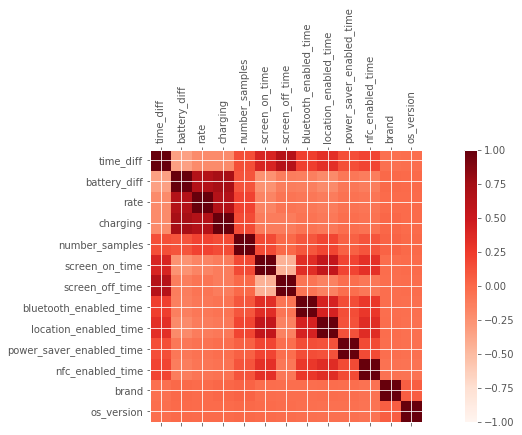

In [8]:
correlations = merged_df.drop(['device_id', 'developer_mode_time', 'flashlight_enabled_time'], axis=1).corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='Reds')
fig.colorbar(cax)
ticks = np.arange(0, len(correlations), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlations.columns, rotation=90)
ax.set_yticklabels(correlations.columns)

plt.show()

# With Only Charge Samples

In [9]:
charge_periods = merged_df[merged_df.charging == True]
charge_periods.drop(['device_id', 'developer_mode_time', 'flashlight_enabled_time', 'charging'], axis=1).corr().style.background_gradient(cmap='Reds')

,time_diff,battery_diff,rate,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,nfc_enabled_time,brand,os_version
time_diff,1,0.0871251,-0.431046,0.0196376,0.428099,0.647618,0.24436,0.334574,0.177864,0.232065,-0.0307767,-0.00952289
battery_diff,0.0871251,1,0.408838,0.5357,-0.0710615,0.147786,-0.0347682,-0.0212061,-0.0272009,-0.0226149,-0.0373952,-0.0232612
rate,-0.431046,0.408838,1,0.332725,-0.194657,-0.270614,-0.113663,-0.145829,-0.074812,-0.0991618,0.000385049,0.00855267
number_samples,0.0196376,0.5357,0.332725,1,0.00324229,0.0170709,0.0257507,0.0811802,0.00747074,0.023376,0.000145228,0.0149537
screen_on_time,0.428099,-0.0710615,-0.194657,0.00324229,1,-0.411368,0.381213,0.609473,0.206427,0.394447,-0.0256386,0.00299202
screen_off_time,0.647618,0.147786,-0.270614,0.0170709,-0.411368,1,-0.0749598,-0.176428,0.00534241,-0.0985182,-0.00942359,-0.0121259
bluetooth_enabled_time,0.24436,-0.0347682,-0.113663,0.0257507,0.381213,-0.0749598,1,0.464158,0.146533,0.417609,-0.02361,-0.0363077
location_enabled_time,0.334574,-0.0212061,-0.145829,0.0811802,0.609473,-0.176428,0.464158,1,0.124163,0.486131,-0.0321158,-0.0224619
power_saver_enabled_time,0.177864,-0.0272009,-0.074812,0.00747074,0.206427,0.00534241,0.146533,0.124163,1,0.150413,-0.036173,-0.0403737
nfc_enabled_time,0.232065,-0.0226149,-0.0991618,0.023376,0.394447,-0.0985182,0.417609,0.486131,0.150413,1,-0.0490995,-0.0467717


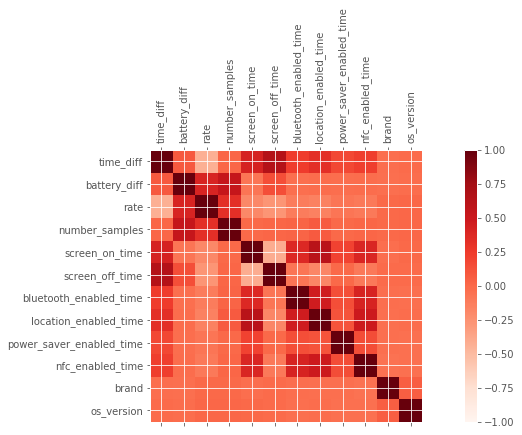

In [10]:
correlations = charge_periods.drop(['device_id', 'developer_mode_time', 'flashlight_enabled_time', 'charging'], axis=1).corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='Reds')
fig.colorbar(cax)
ticks = np.arange(0, len(correlations), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlations.columns, rotation=90)
ax.set_yticklabels(correlations.columns)

plt.show()

# With Only Discharge Samples

In [11]:
discharge_periods = merged_df[merged_df.charging == False]
discharge_periods.drop(['device_id', 'developer_mode_time', 'flashlight_enabled_time', 'charging'], axis=1).corr().style.background_gradient(cmap='Reds')

,time_diff,battery_diff,rate,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,nfc_enabled_time,brand,os_version
time_diff,1,-0.546934,0.235625,0.33174,0.387146,0.618804,0.209174,0.313978,0.120162,0.172484,-0.0521403,-0.0456164
battery_diff,-0.546934,1,0.25416,-0.569488,-0.369315,-0.204196,-0.204194,-0.306714,-0.121488,-0.19563,0.0234606,0.0343057
rate,0.235625,0.25416,1,-0.159346,-0.0604637,0.27504,-0.0123849,-0.0275333,-0.0193324,-0.0239672,-0.0473989,-0.0315829
number_samples,0.33174,-0.569488,-0.159346,1,0.345465,0.0203708,0.196081,0.316797,0.0853248,0.203027,0.062931,0.00335857
screen_on_time,0.387146,-0.369315,-0.0604637,0.345465,1,-0.48472,0.321247,0.518933,0.188726,0.288217,-0.011358,-0.0204383
screen_off_time,0.618804,-0.204196,0.27504,0.0203708,-0.48472,1,-0.0752646,-0.14427,-0.0467987,-0.0819303,-0.0397861,-0.0258602
bluetooth_enabled_time,0.209174,-0.204194,-0.0123849,0.196081,0.321247,-0.0752646,1,0.409777,0.152694,0.210666,-0.0269921,-0.0351694
location_enabled_time,0.313978,-0.306714,-0.0275333,0.316797,0.518933,-0.14427,0.409777,1,0.130596,0.296777,-0.0160642,-0.0547718
power_saver_enabled_time,0.120162,-0.121488,-0.0193324,0.0853248,0.188726,-0.0467987,0.152694,0.130596,1,0.171023,-0.0232741,-0.0476529
nfc_enabled_time,0.172484,-0.19563,-0.0239672,0.203027,0.288217,-0.0819303,0.210666,0.296777,0.171023,1,-0.0544767,-0.0698476


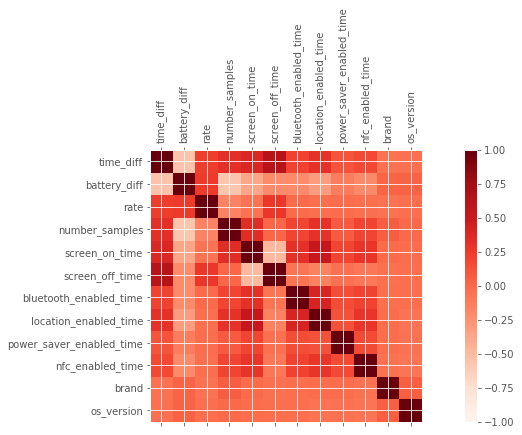

In [12]:
correlations = discharge_periods.drop(['device_id', 'developer_mode_time', 'flashlight_enabled_time', 'charging'], axis=1).corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='Reds')
fig.colorbar(cax)
ticks = np.arange(0, len(correlations), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlations.columns, rotation=90)
ax.set_yticklabels(correlations.columns)

plt.show()